<a href="https://colab.research.google.com/github/Fragoa/SE2-deep-learning/blob/main/SE2_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
def build_compile(optimizer_name='SGD'):
    model = keras.Sequential([
        keras.layers.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    if optimizer_name.lower() == 'sgd':
        optimizer = 'sgd'
    elif optimizer_name.lower() == 'momentum':
        optimizer = keras.optimizers.SGD(momentum=0.9)
    elif optimizer_name.lower() == 'nag':
        optimizer = keras.optimizers.SGD(nesterov=True, momentum=0.9)
    elif optimizer_name.lower() == 'adagrad':
        optimizer = 'adagrad'
    elif optimizer_name.lower() == 'rmsprop':
        optimizer = 'rmsprop'
    elif optimizer_name.lower() == 'adam':
        optimizer = 'adam'
    else:
        raise ValueError(f"Optimizer '{optimizer_name}' not recognized.")

    model.compile(optimizer=optimizer,
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model


In [7]:
optimizers = ['SGD', 'Momentum', 'NAG', 'Adagrad', 'RMSprop', 'Adam']
histories = {}
epochs = 50
batch_size = 32

In [9]:
for optimizer_name in optimizers:
    print(f"\nTraining with optimizer: {optimizer_name}")
    model = build_compile(optimizer_name)
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=0)
    histories[optimizer_name] = history.history



Training with optimizer: SGD

Training with optimizer: Momentum

Training with optimizer: NAG

Training with optimizer: Adagrad

Training with optimizer: RMSprop

Training with optimizer: Adam


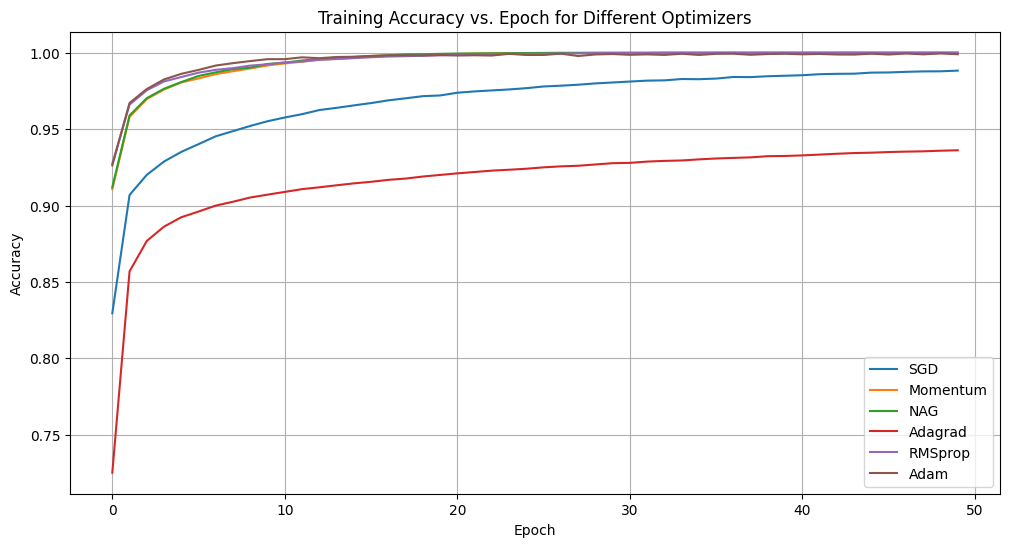

In [10]:
plt.figure(figsize=(12, 6))
for optimizer_name in optimizers:
    plt.plot(histories[optimizer_name]['accuracy'], label=optimizer_name)
plt.title('Training Accuracy vs. Epoch for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

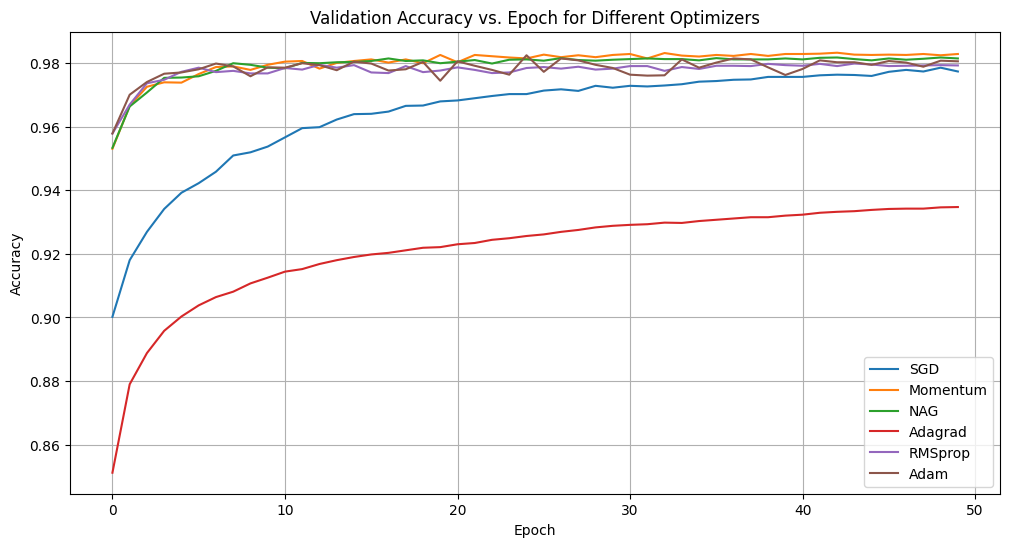

In [11]:
plt.figure(figsize=(12, 6))
for optimizer_name in optimizers:
    plt.plot(histories[optimizer_name]['val_accuracy'], label=optimizer_name)
plt.title('Validation Accuracy vs. Epoch for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()